In [21]:
path = '/data/other/aksellaa/yolov7-miniproj/output/RDD2022_Norway_20221123-111302.txt'
dataset = '/data/datasets/tdt17/RDD2022/Norway/test/images'
n = 5

In [22]:
import random
from pathlib import Path
from typing import Tuple, List
from tdt17.label import Label

def parse_prediction(line: str) -> Tuple[str, List[Label]]:
    name, prediction_string = line.split(',')
    label_parts = prediction_string.split(' ')
    labels = [Label.from_ltrb_string(' '.join(label_parts[i*5:(i+1)*5])) for i in range(0, len(label_parts) // 5)]
    return name, labels

with open(path) as f:
    predictions = list(map(parse_prediction, f.readlines()))

predictions = [pred for pred in predictions if pred[1] and (Path(dataset) / pred[0]).is_file()]
selected_predictions = random.sample(predictions, n)

In [23]:
import matplotlib.pyplot as plt
from PIL import Image

def class_id_to_name(class_id: int) -> str:
    return {
        0: "D00",
        1: "D10",
        2: "D20",
        3: "D40",
    }[class_id]

def plot_bounding_boxes_on_ax(ax: plt.Axes, image_path: str, labels: List[Label]):
    image = Image.open(image_path)
    ax.imshow(image)
    for label in labels:
        rect = label.rect
        ax.add_patch(plt.Rectangle((rect.l, rect.t), rect.w, rect.h, fill=False, edgecolor="yellow", linewidth=1))
        ax.text(rect.l, rect.t, class_id_to_name(label.id), bbox=dict(facecolor="yellow", alpha=0.5), fontsize=10)


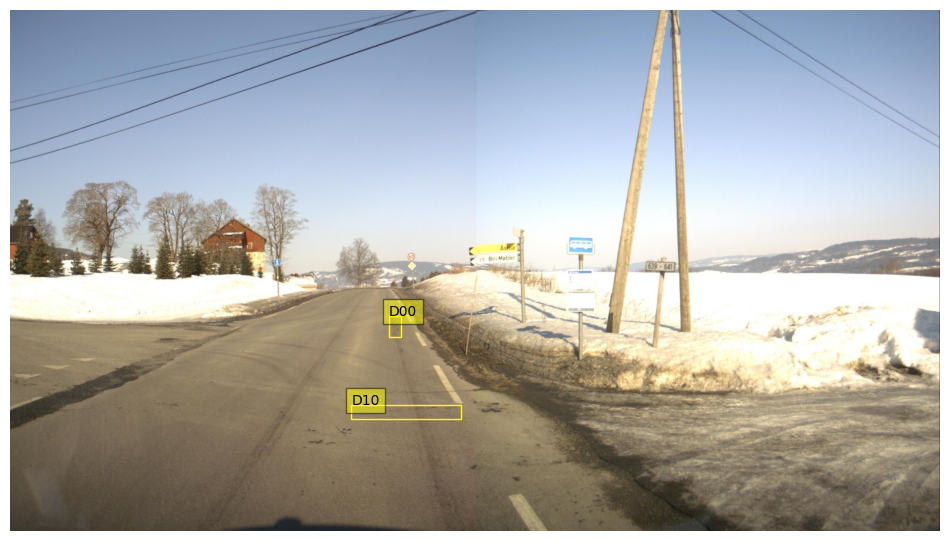

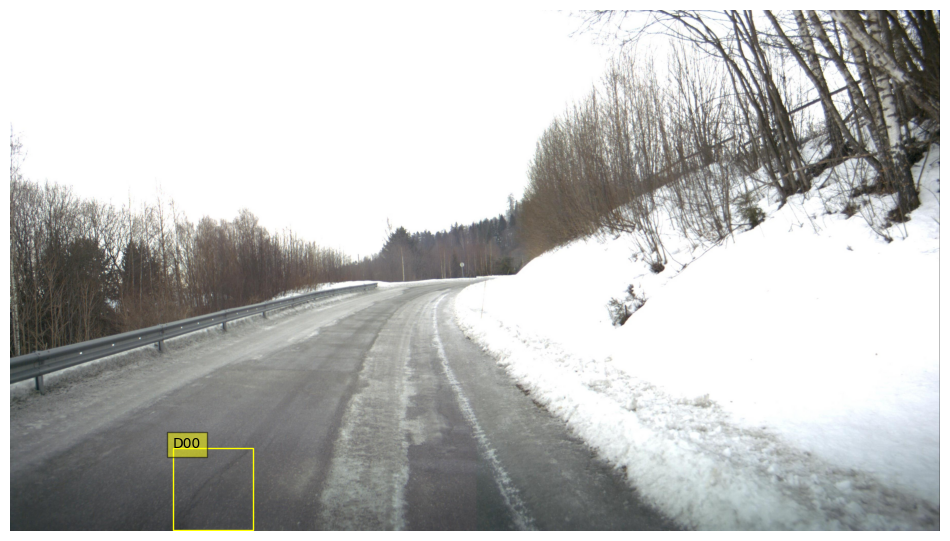

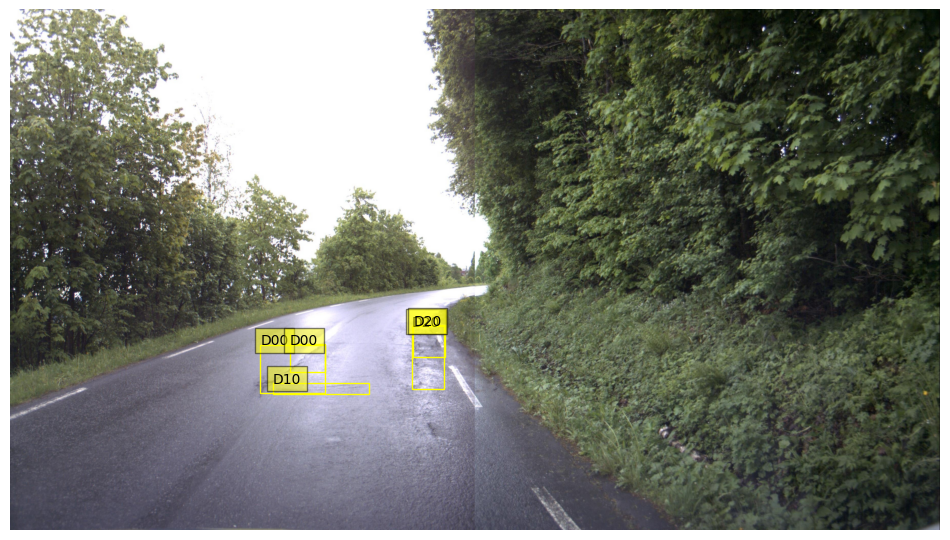

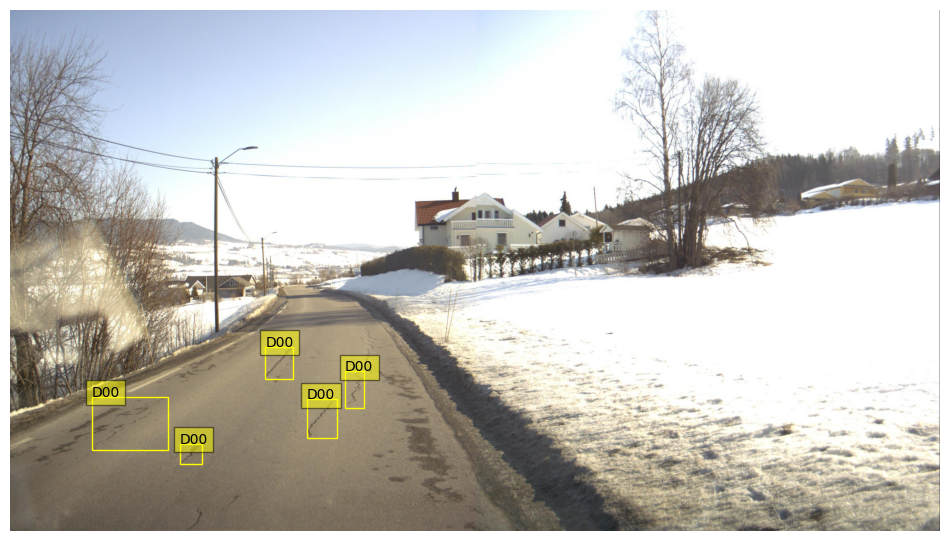

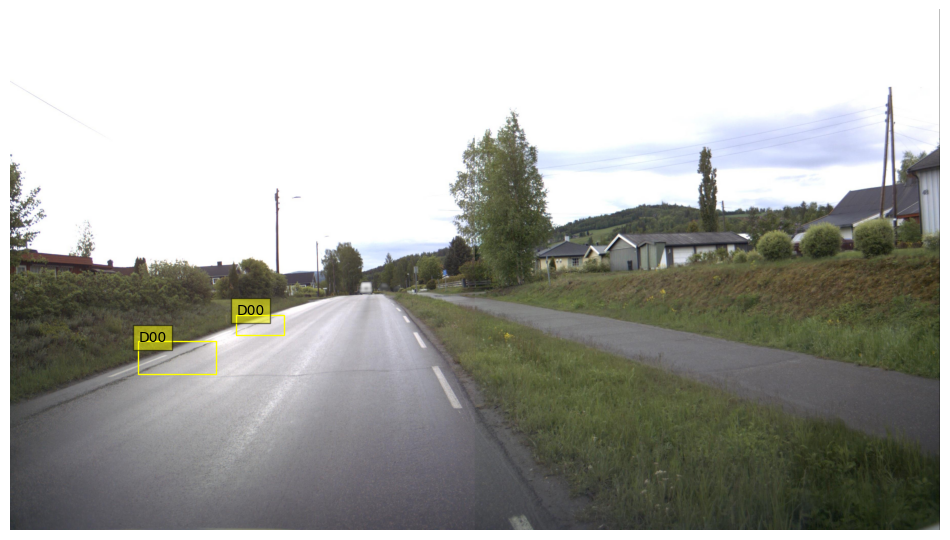

In [24]:
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

for name, labels in selected_predictions:
    image_path = Path(dataset) / name
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    plot_bounding_boxes_on_ax(ax, str(image_path), labels)
    plt.axis('off')
    plt.show()